In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import functools

In [19]:
Product_TPI = "../../../datos/CM01_1/Product_TPI_2021-03-01.csv"
Product_TPI_dt = pd.read_csv(Product_TPI)
Product_TPI_filtered = Product_TPI_dt[Product_TPI_dt['value'].notna()]

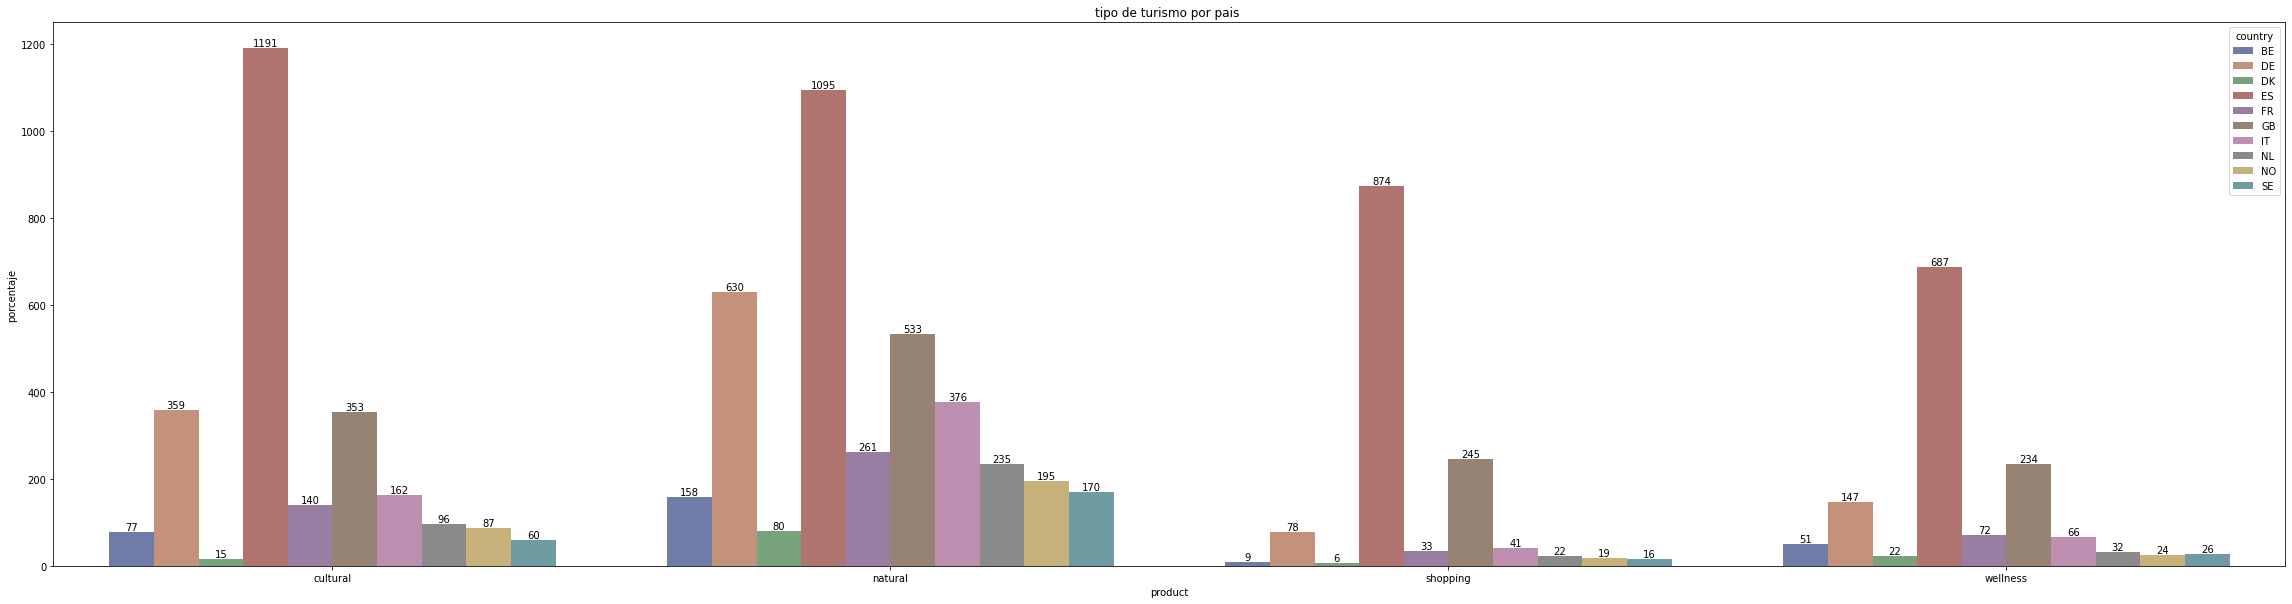

In [20]:
df = Product_TPI_filtered.groupby(['country','product']).agg(porcentaje=('value', 'count'))
df = df.reset_index()
fig, ax = plt.subplots(figsize=(40,10))
  
ax= sns.barplot(x="product",
           y="porcentaje",
           hue="country",
           data=df,ci="sd", 
           palette="dark",
           alpha=.6)
ax.set_title('tipo de turismo por pais ')

for container in ax.containers:
    ax.bar_label(container)

In [21]:
product_ages = "../../../datos/CM01_1/product_ages_2021-03-01.csv"
product_ages_dt = pd.read_csv(product_ages)

product_ages_filtered = product_ages_dt[(product_ages_dt != 0).all(1)]


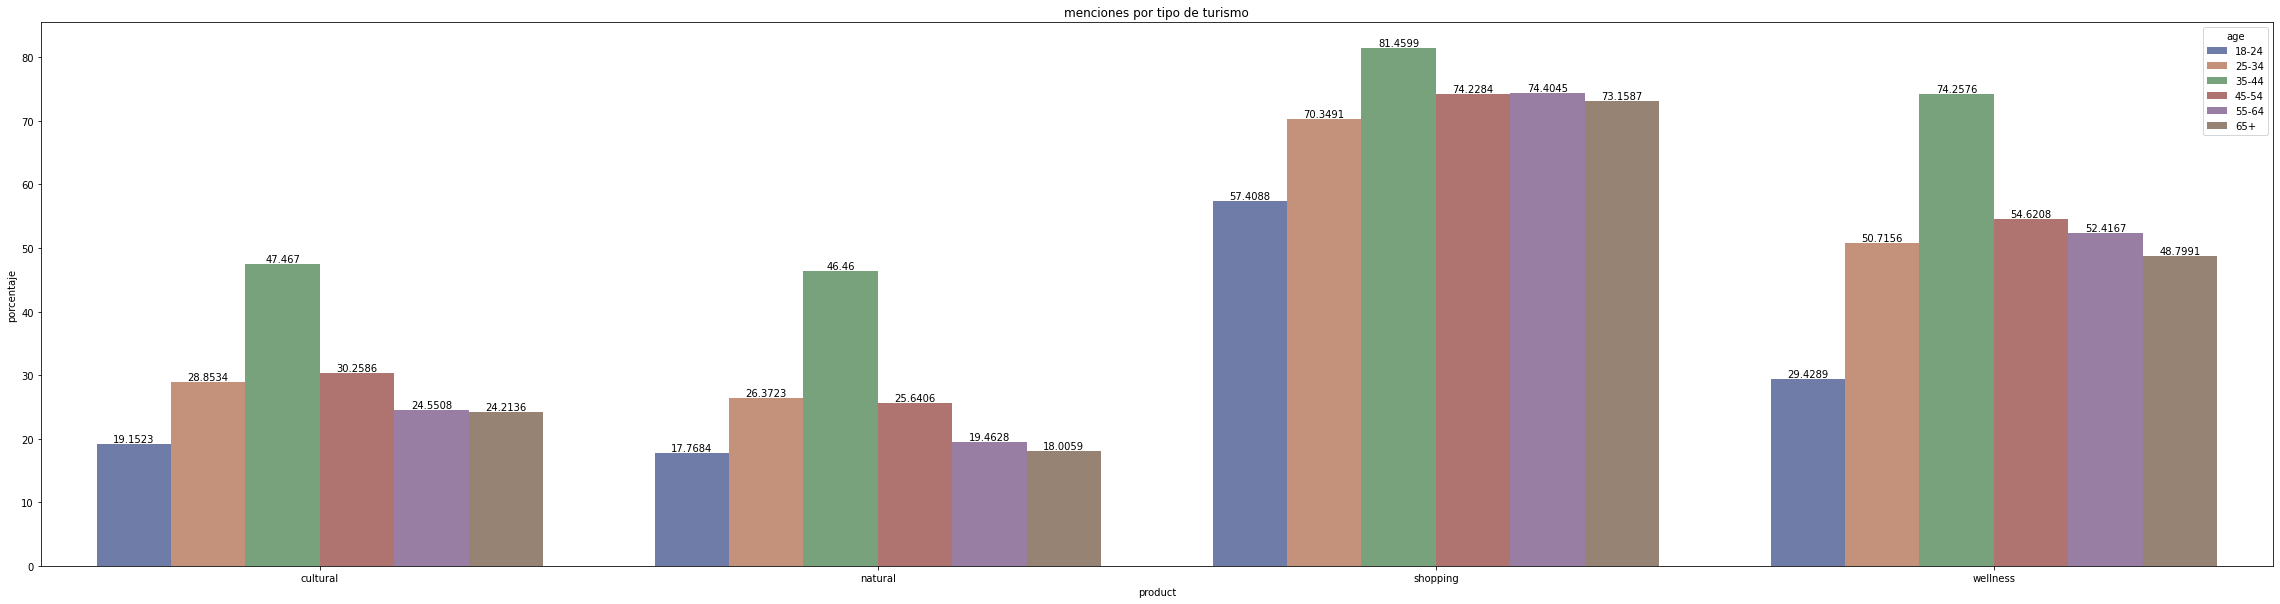

In [22]:
df =product_ages_filtered.groupby([ 'age', 'product']).agg(porcentaje=('mentions', 'mean'))
df = df.reset_index()
fig, ax = plt.subplots(figsize=(40,10))
  
ax= sns.barplot(x="product",
           y="porcentaje",
           hue="age",
           data=df,ci="sd", 
           palette="dark",
           alpha=.6)
ax.set_title('menciones por tipo de turismo')

for container in ax.containers:
    ax.bar_label(container)

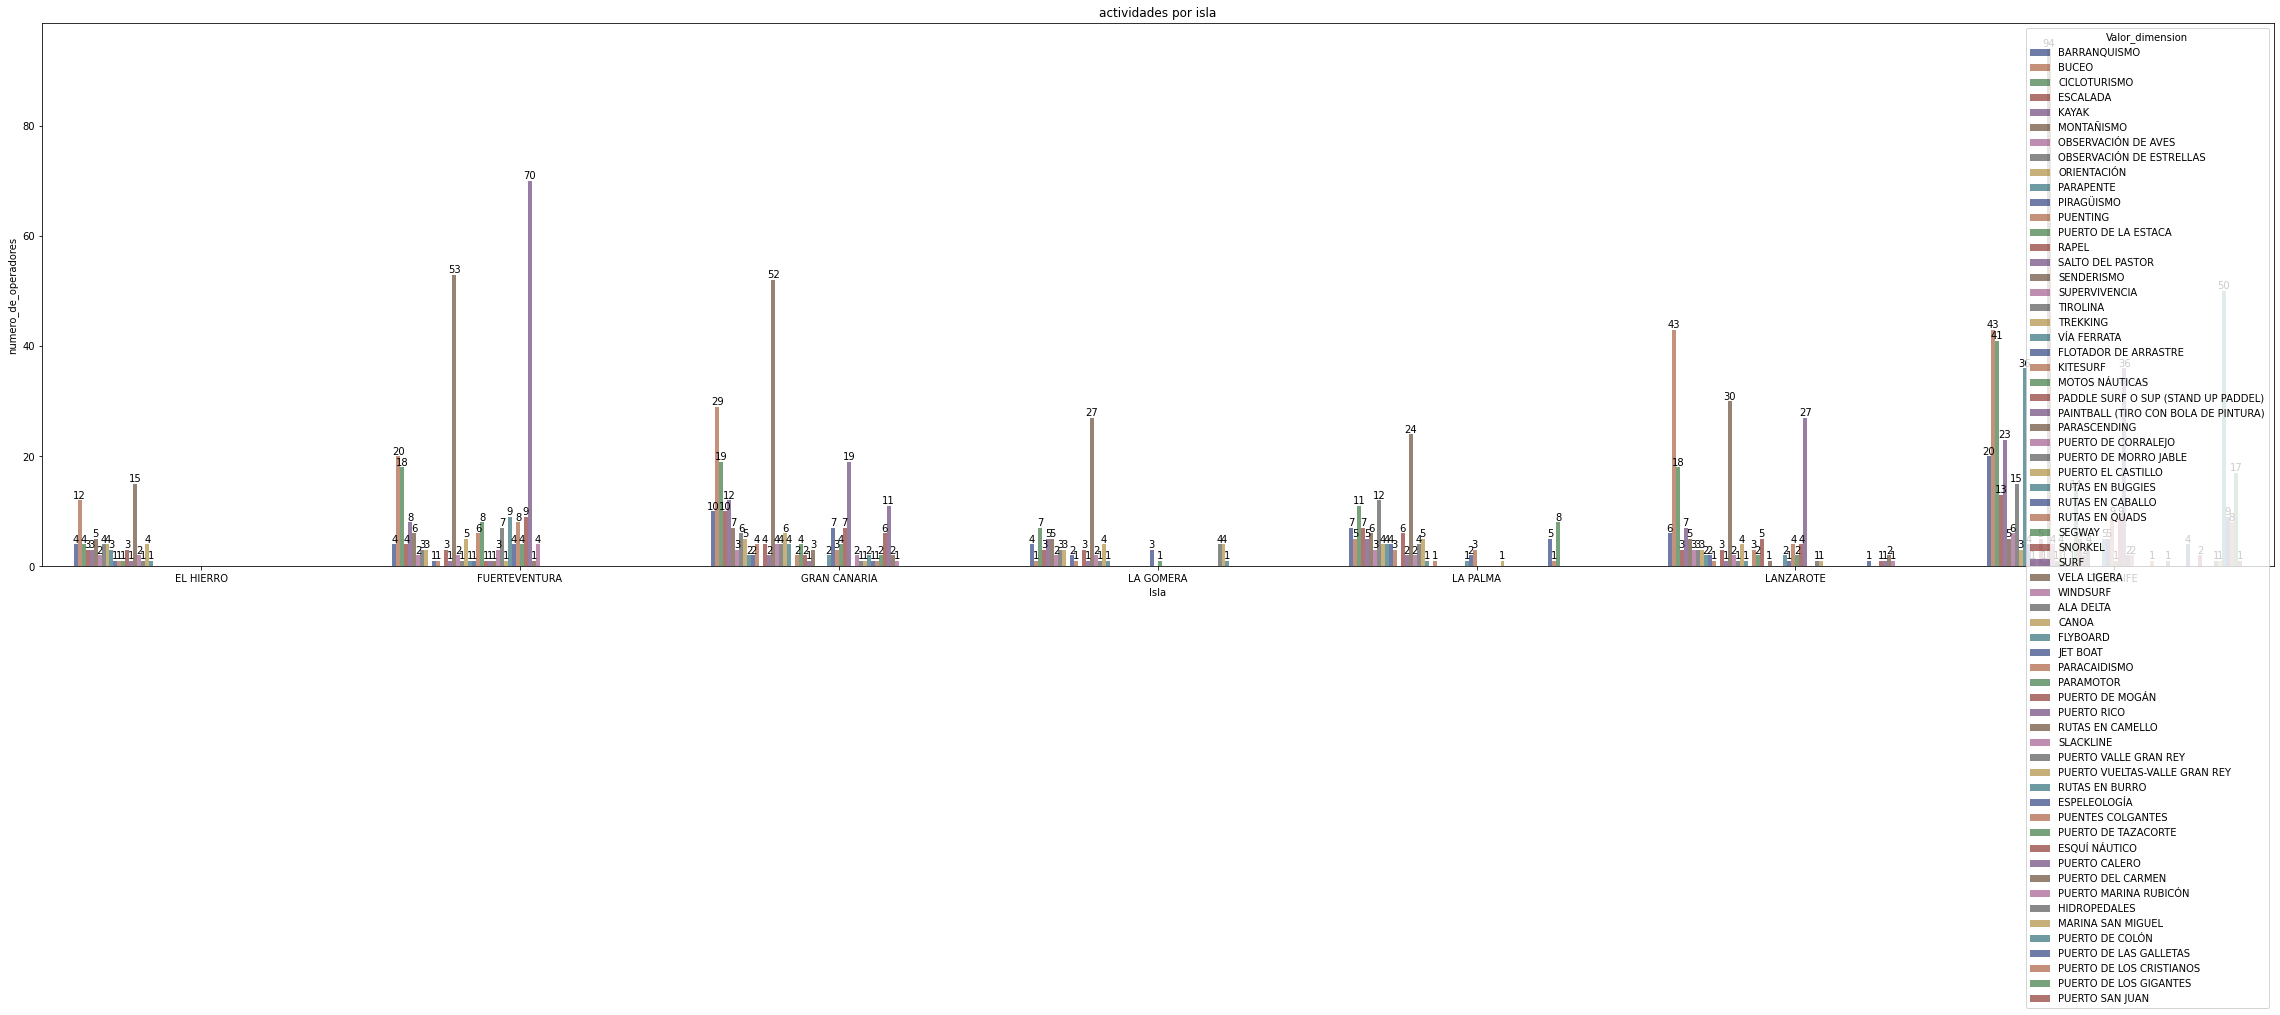

In [49]:
maestro_cm33 = "../../../datos/CM33/maestro_cm33.csv"
maestro_cm33_dt = pd.read_csv(maestro_cm33)
maestro_cm33_dt.head(20)



df = maestro_cm33_dt.groupby(['Isla','Valor_dimension']).agg(numero_de_operadores=('Operador','count'))
df = df.reset_index()
fig, ax = plt.subplots(figsize=(40,10))
  
ax= sns.barplot(x="Isla",
           y="numero_de_operadores",
           hue="Valor_dimension",
           data=df,ci="sd", 
           palette="dark",
           alpha=.6)
ax.set_title('actividades por isla')

for container in ax.containers:
    ax.bar_label(container)

In [24]:
hourly_mentions_2021 = "../../../datos/CM01_1/hourly_mentions_2021-03-01.csv"
hourly_mentions_2021_dt = pd.read_csv(hourly_mentions_2021)
hourly_mentions_2021_dt=hourly_mentions_2021_dt.dropna(axis=0)

#hourly_mentions_2021_dt.groupby(['hour', 'venue'])['mentions_percent'].count()

hourly_mentions_2021_dt




,day,venue,hour,mentions_percent
10,2017-09-01,playadelingles,10:00,14.29
13,2017-09-01,playadelingles,13:00,14.29
16,2017-09-01,playadelingles,16:00,14.29
20,2017-09-01,playadelingles,20:00,14.29
22,2017-09-01,playadelingles,22:00,28.57
...,...,...,...,...
612094,2021-02-27,roquenublo,22:00,33.33
612409,2021-02-27,grancanariaarena,01:00,100.00
612476,2021-02-28,lascanteras,20:00,100.00
612993,2021-03-01,puertodemogan,09:00,100.00


In [25]:
'''
df = hourly_mentions_2021_dt.groupby(['hour','venue']).agg(menciones=('mentions_percent','count'))
df = df.reset_index()
fig, ax = plt.subplots(figsize=(100,20))
  
ax= sns.barplot(x="venue",
           y="menciones",
           hue="hour",
           data=df,ci="sd", 
           palette="dark",
           alpha=.6)
ax.set_title('Menciones por hora de cada venue')

for container in ax.containers:
    ax.bar_label(container)'''

'\ndf = hourly_mentions_2021_dt.groupby([\'hour\',\'venue\']).agg(menciones=(\'mentions_percent\',\'count\'))\ndf = df.reset_index()\nfig, ax = plt.subplots(figsize=(100,20))\n  \nax= sns.barplot(x="venue",\n           y="menciones",\n           hue="hour",\n           data=df,ci="sd", \n           palette="dark",\n           alpha=.6)\nax.set_title(\'Menciones por hora de cada venue\')\n\nfor container in ax.containers:\n    ax.bar_label(container)'

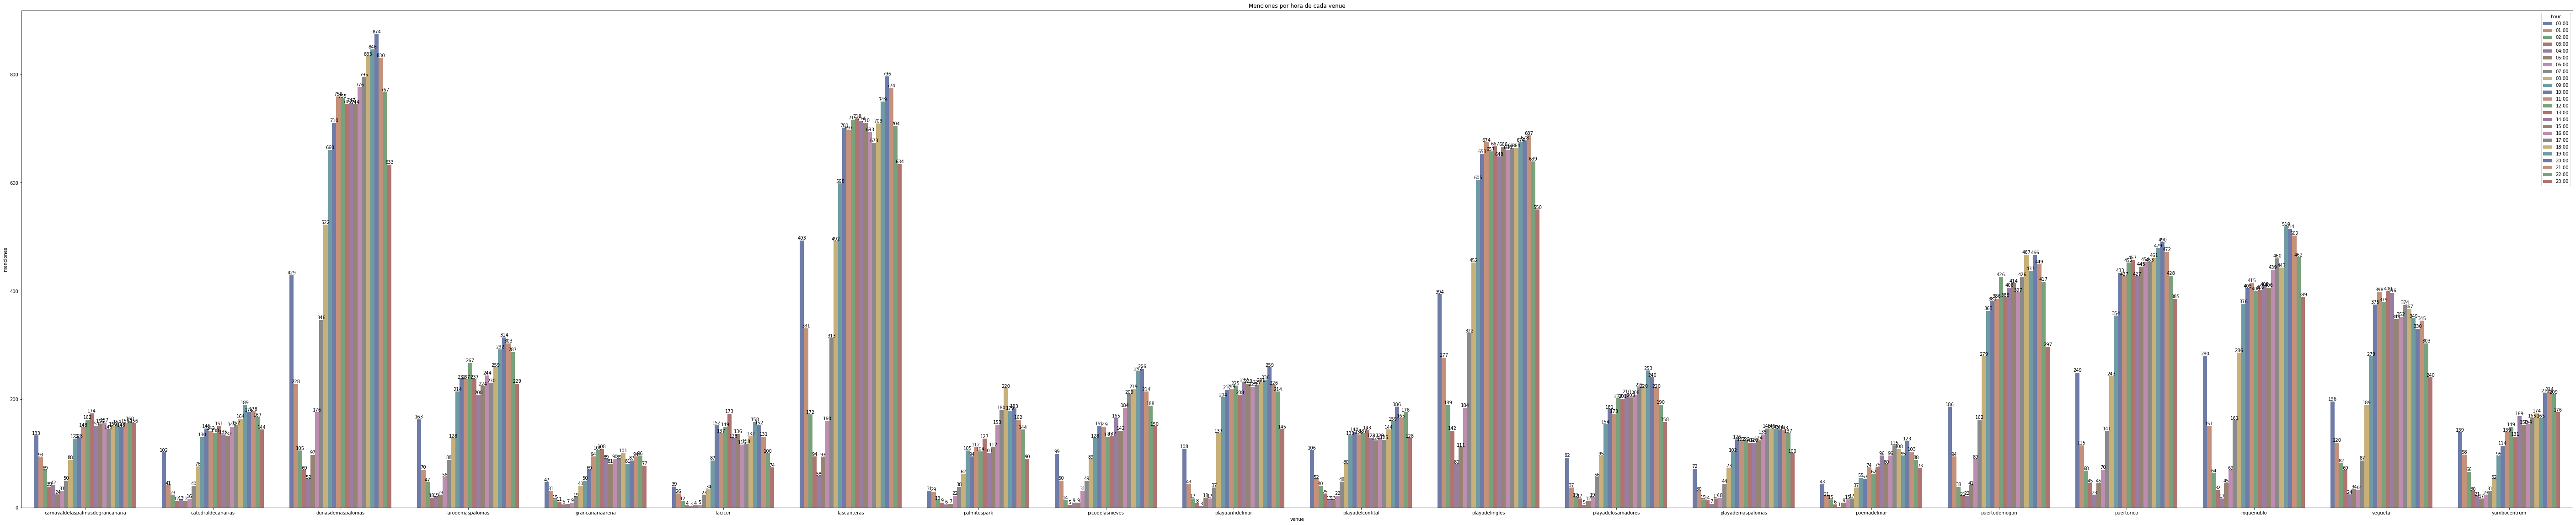

In [26]:
hourly_mentions_2021 = "../../../datos/CM01_1/hourly_mentions_2021-03-01.csv"
hourly_mentions_2021_dt = pd.read_csv(hourly_mentions_2021)
hourly_mentions_2021_dt=hourly_mentions_2021_dt.dropna(axis=0)

#hourly_mentions_2021_dt.groupby(['hour', 'venue'])['mentions_percent'].count()

df = hourly_mentions_2021_dt.groupby(['hour','venue']).agg(menciones=('mentions_percent','count'))
df = df.reset_index()
fig, ax = plt.subplots(figsize=(100,20))
  
ax= sns.barplot(x="venue",
           y="menciones",
           hue="hour",
           data=df,ci="sd", 
           palette="dark",
           alpha=.6)
ax.set_title('Menciones por hora de cada venue')

for container in ax.containers:
    ax.bar_label(container)

In [27]:
maestro_cm29 = "../../../datos/CM29/maestro_cm29.csv"
maestro_cm29 = pd.read_csv(maestro_cm29)
maestro_cm29.describe()

maestro_cm29.groupby(['Isla','Comercio'])['Valor'].sum()

Isla           Comercio    
El Hierro      Bares             1099.0
               Comerc_vinos         7.0
               Restaurantes       962.0
Fuerteventura  Bares            22468.0
               Restaurantes     10125.0
Gran Canaria   Bares            59935.0
               Comerc_vinos        31.0
               Restaurantes     31367.0
La Gomera      Bares             2710.0
               Restaurantes      2366.0
La Palma       Bares            10490.0
               Restaurantes      3237.0
Lanzarote      Bares            30356.0
               Restaurantes     18605.0
Tenerife       Bares           137082.0
               Comerc_vinos       772.0
               Restaurantes     74435.0
Name: Valor, dtype: float64

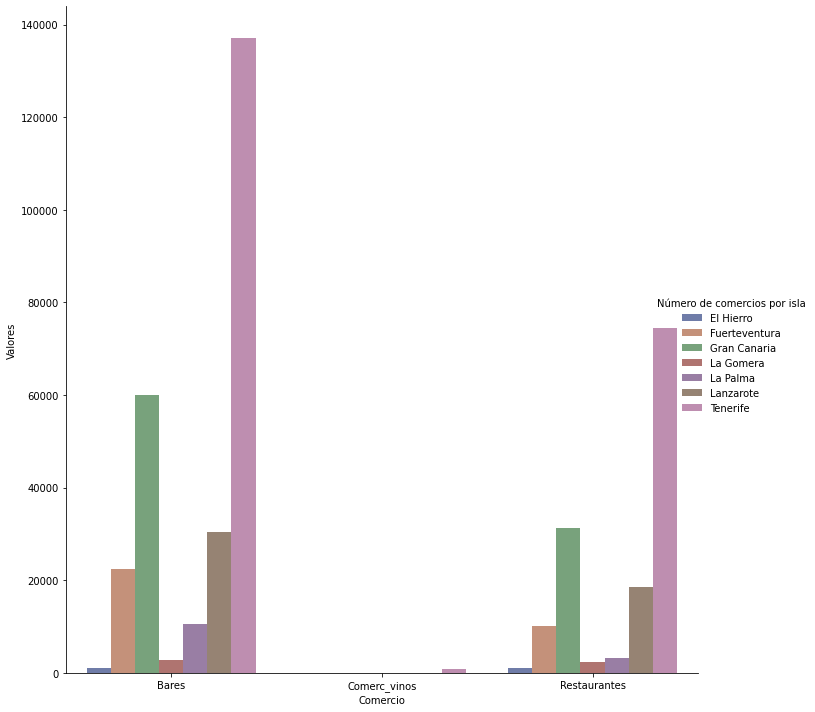

In [36]:
df = maestro_cm29.groupby(['Isla','Comercio']).agg(valores=('Valor','sum'))
df = df.reset_index()
  
ax= sns.catplot(x="Comercio",
            kind='bar',
           y="valores",
           hue="Isla",
           data=df,ci="sd", 
           palette="dark",
           height=10,
           alpha=.6)

ax.set_axis_labels("Comercio", "Valores")
ax.legend.set_title("Número de comercios por isla")

In [37]:
maestro_cm19 = "../../../datos/CM19/maestro_cm19.csv"
evol_cm19 = "../../../datos/CM19/evolucion_cm19.csv"
maestro_cm19_dt = pd.read_csv(maestro_cm19)
evol_cm19_dt = pd.read_csv(evol_cm19)

evol_cm19_clean = evol_cm19_dt.rename(columns = {'anyo_': 'anyo', 'mes_': 'mes'}, inplace = False)

combined_cm19_dt = pd.concat([maestro_cm19_dt, evol_cm19_clean])
combined_cm19_dt

,Unnamed: 0,lugar,origen,anyo,mes,valor,indicador,dimension
0,0,Isla De Gran Canaria,Residentes en España,2021,5,17174.0,Viajeros,Zonas turísticas
1,1,Isla De Gran Canaria,Residentes en España,2021,4,14839.0,Viajeros,Zonas turísticas
2,2,Isla De Gran Canaria,Residentes en España,2021,3,16440.0,Viajeros,Zonas turísticas
3,3,Isla De Gran Canaria,Residentes en España,2021,3,16440.0,Viajeros,Zonas turísticas
4,4,Isla De Gran Canaria,Residentes en España,2021,3,11741.0,Viajeros,Zonas turísticas
...,...,...,...,...,...,...,...,...
32311,32311,Valle Gran Rey,NaN,2011,12,180.0,Personal empleado,Puntos turísticos
32312,32312,Valle Gran Rey,NaN,2011,11,190.0,Personal empleado,Puntos turísticos
32313,32313,Valle Gran Rey,NaN,2011,9,187.0,Personal empleado,Puntos turísticos
32314,32314,Valle Gran Rey,NaN,2011,8,166.0,Personal empleado,Puntos turísticos


In [38]:
combined_cm19_filtered = combined_cm19_dt.drop_duplicates()
combined_cm19_filtered

,Unnamed: 0,lugar,origen,anyo,mes,valor,indicador,dimension
0,0,Isla De Gran Canaria,Residentes en España,2021,5,17174.0,Viajeros,Zonas turísticas
1,1,Isla De Gran Canaria,Residentes en España,2021,4,14839.0,Viajeros,Zonas turísticas
2,2,Isla De Gran Canaria,Residentes en España,2021,3,16440.0,Viajeros,Zonas turísticas
3,3,Isla De Gran Canaria,Residentes en España,2021,3,16440.0,Viajeros,Zonas turísticas
4,4,Isla De Gran Canaria,Residentes en España,2021,3,11741.0,Viajeros,Zonas turísticas
...,...,...,...,...,...,...,...,...
32311,32311,Valle Gran Rey,NaN,2011,12,180.0,Personal empleado,Puntos turísticos
32312,32312,Valle Gran Rey,NaN,2011,11,190.0,Personal empleado,Puntos turísticos
32313,32313,Valle Gran Rey,NaN,2011,9,187.0,Personal empleado,Puntos turísticos
32314,32314,Valle Gran Rey,NaN,2011,8,166.0,Personal empleado,Puntos turísticos


In [39]:
combined_cm19_filtered['lugar'] = combined_cm19_filtered['lugar'].fillna(value = 'NON-ID')
combined_cm19_filtered

/tmp/ipykernel_45131/2417293195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_cm19_filtered['lugar'] = combined_cm19_filtered['lugar'].fillna(value = 'NON-ID')


,Unnamed: 0,lugar,origen,anyo,mes,valor,indicador,dimension
0,0,Isla De Gran Canaria,Residentes en España,2021,5,17174.0,Viajeros,Zonas turísticas
1,1,Isla De Gran Canaria,Residentes en España,2021,4,14839.0,Viajeros,Zonas turísticas
2,2,Isla De Gran Canaria,Residentes en España,2021,3,16440.0,Viajeros,Zonas turísticas
3,3,Isla De Gran Canaria,Residentes en España,2021,3,16440.0,Viajeros,Zonas turísticas
4,4,Isla De Gran Canaria,Residentes en España,2021,3,11741.0,Viajeros,Zonas turísticas
...,...,...,...,...,...,...,...,...
32311,32311,Valle Gran Rey,NaN,2011,12,180.0,Personal empleado,Puntos turísticos
32312,32312,Valle Gran Rey,NaN,2011,11,190.0,Personal empleado,Puntos turísticos
32313,32313,Valle Gran Rey,NaN,2011,9,187.0,Personal empleado,Puntos turísticos
32314,32314,Valle Gran Rey,NaN,2011,8,166.0,Personal empleado,Puntos turísticos


TypeError: 'Legend' object is not callable

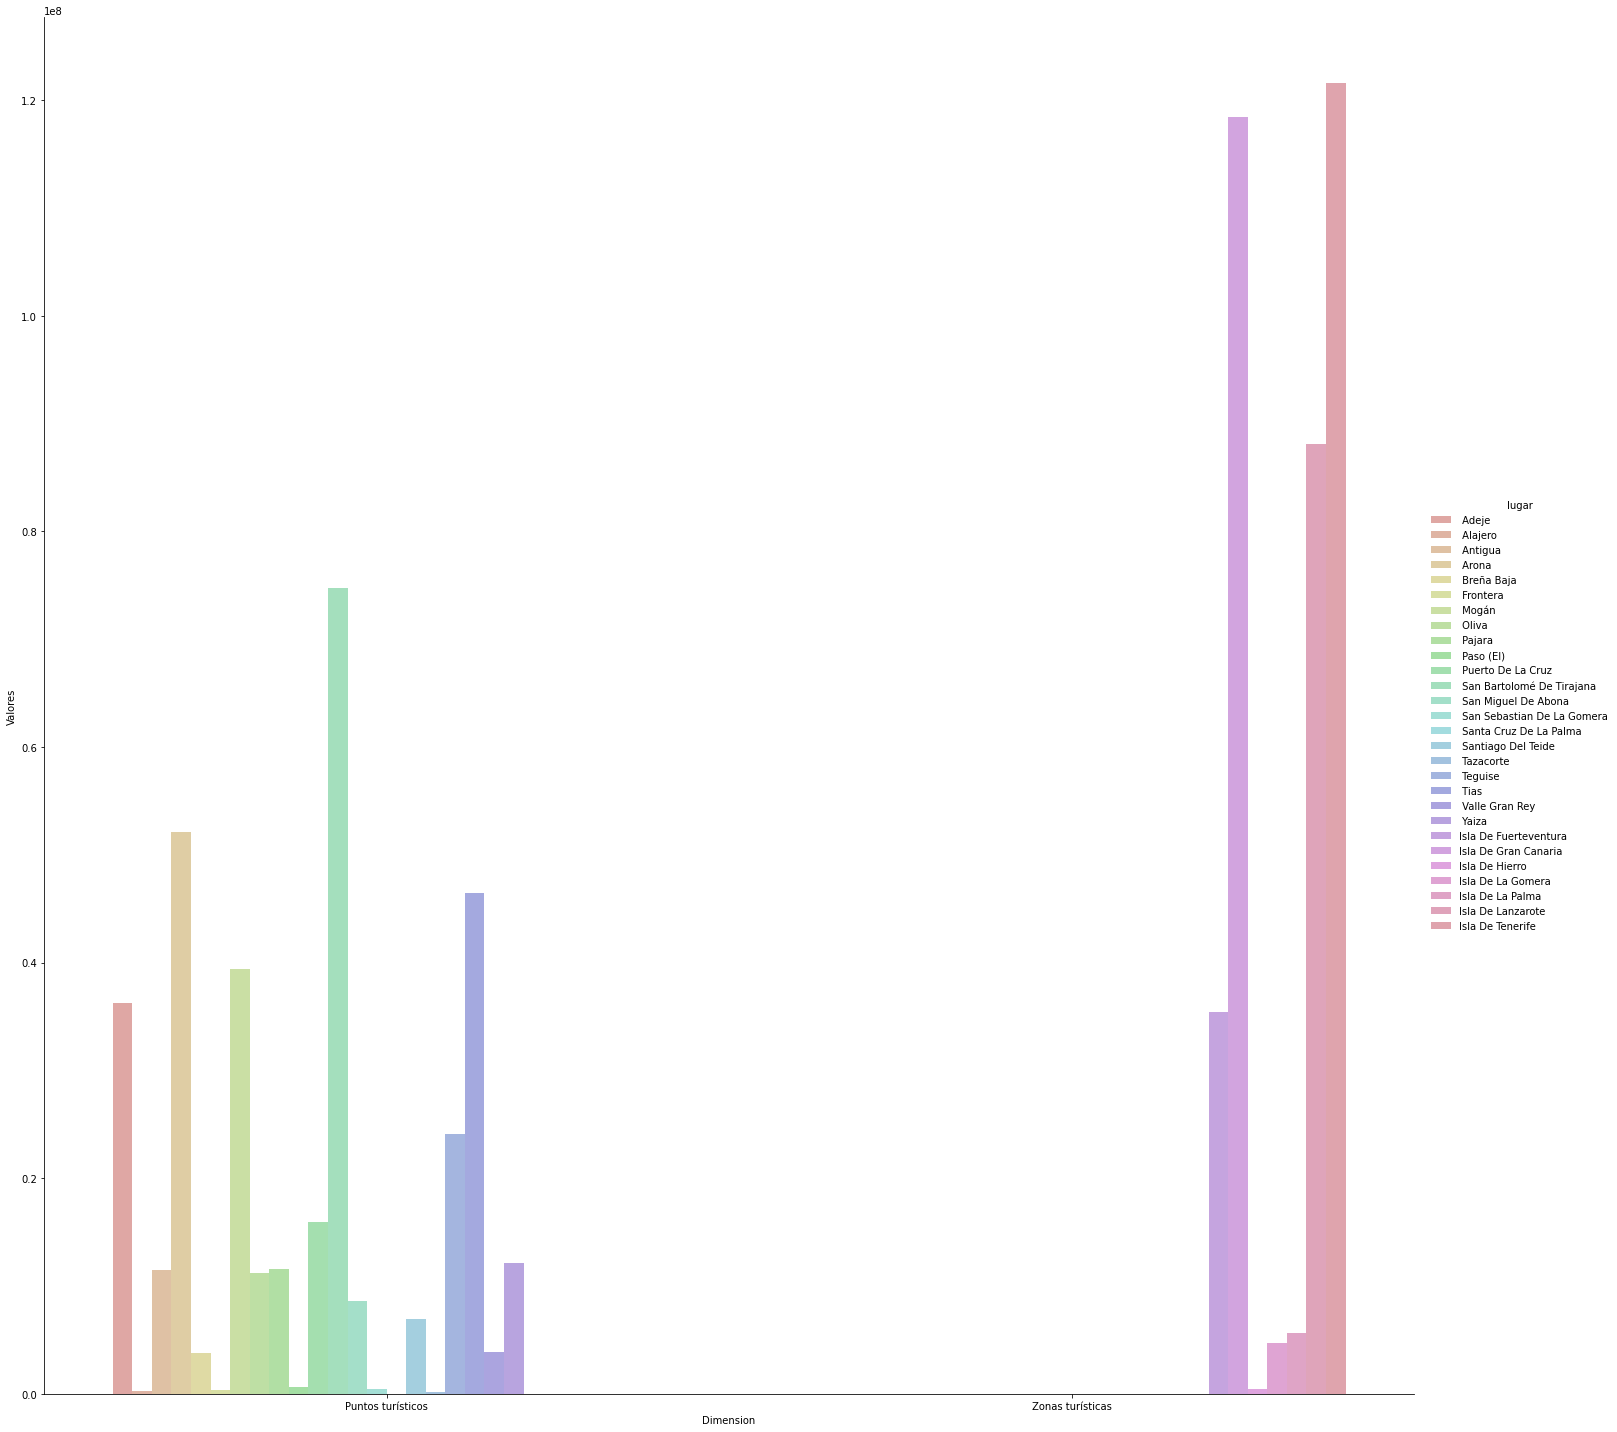

In [48]:
df = combined_cm19_filtered.groupby(['lugar','dimension']).agg(valores=('valor','sum'))
df = df.reset_index()
  
ax= sns.catplot(x="dimension",
            kind='bar',
           y="valores",
           hue="lugar",
           data=df,ci="sd", 
           palette="hls",
           height=20,
           alpha=.6)

ax.set_axis_labels("Dimension", "Valores")
ax.legend(ncol=2)
ax.legend.set_title("Número de establecimientos turísticos por lugars en gran canaria")